The Electric Vehicle (EV) market is witnessing a remarkable surge driven by environmental concerns, technological advancements, and favorable government policies worldwide. This growth trajectory is fueled by the continuous innovation in EV technology, leading to longer driving ranges, faster charging times, and enhanced performance. Automakers, including industry giants like Tesla, Nissan, and BMW, are heavily investing in EV production and development, while tech companies such as Rivian and Lucid Motors are pushing the boundaries of electric drivetrains and autonomous capabilities. Moreover, the availability of government incentives like tax credits and subsidies, coupled with the growing awareness of the environmental benefits of EVs, is encouraging consumers to embrace electric vehicles as a sustainable and eco-friendly alternative to traditional gasoline-powered cars.

Despite the significant progress, challenges such as the need for expanded charging infrastructure, upfront costs, and range anxiety remain areas of focus for industry stakeholders. Companies specializing in charging infrastructure like ChargePoint and EVgo are expanding networks to address these concerns. Looking ahead, the EV market is poised for further growth, with ongoing advancements in battery technology, increased affordability, and a broader range of vehicle options expected to drive continued adoption. The future of the EV market holds promise for a cleaner, greener transportation ecosystem, with EVs likely to play a pivotal role in shaping the automotive industry's sustainable future.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Internship/ev_market.xlsx")
df

,Date,Car_Model,Manufacturing_Location,Production_Quantity,Sales_Price,Cost_Price,Profit_Percent,Market_Share,Customer_Satisfaction,Fuel_Type,Engine_Size (cc),Mileage (km/l),Warranty_Period (months),Safety_Rating,Color,Transmission,Country_of_Origin,Monthly_Advertising_Expense,Dealership_Location
0,2010-01-04,Hatchback,South Korea,577,60600,53105,8.218300,9.020634,2.258014,Electric,5717,12.582133,33,3,Black,Manual,Italy,3148,Urban
1,2010-01-06,SUV,Japan,444,44430,18852,14.804830,5.902264,1.596249,Electric,3620,17.372605,49,3,Silver,Manual,Japan,5812,Rural
2,2010-01-08,Truck,USA,322,27257,41405,18.248501,0.534987,3.962075,Electric,5837,8.913388,53,3,Blue,Manual,Germany,8361,Urban
3,2010-01-09,Sports Car,USA,880,31523,38144,15.224574,3.864781,4.598860,Electric,3640,11.960667,12,1,Blue,Automatic,Italy,9895,Urban
4,2010-01-15,Sedan,Germany,249,69082,27571,7.459681,3.669260,2.289299,Electric,1495,8.945819,32,4,Black,Manual,Italy,1511,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,2022-12-21,SUV,USA,492,17760,50384,10.441112,0.396188,3.348650,Electric,5373,19.188966,28,4,Red,Manual,Japan,8586,Urban
1643,2022-12-22,Sports Car,USA,682,54078,29377,8.619487,4.194178,3.566288,Electric,1118,12.664135,52,3,Silver,Automatic,USA,3029,Urban
1644,2022-12-24,Hatchback,USA,241,78836,57385,19.438637,9.731572,3.892512,Electric,1870,8.816563,56,4,Silver,Automatic,Germany,7663,Suburban
1645,2022-12-25,Sports Car,USA,622,53452,53133,12.952730,9.726071,4.735851,Electric,3842,7.556280,44,1,Red,Automatic,Germany,3011,Urban


In [ ]:
column_names = df.columns.tolist()
print(column_names)

['Date', 'Car_Model', 'Manufacturing_Location', 'Production_Quantity', 'Sales_Price', 'Cost_Price', 'Profit_Percent', 'Market_Share', 'Customer_Satisfaction', 'Fuel_Type', 'Engine_Size (cc)', 'Mileage (km/l)', 'Warranty_Period (months)', 'Safety_Rating', 'Color', 'Transmission', 'Country_of_Origin', 'Monthly_Advertising_Expense', 'Dealership_Location']


In [ ]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1647
Number of columns: 19


In [ ]:
# Check for missing values
print(df.isnull().sum())

Date                           0
Car_Model                      0
Manufacturing_Location         0
Production_Quantity            0
Sales_Price                    0
Cost_Price                     0
Profit_Percent                 0
Market_Share                   0
Customer_Satisfaction          0
Fuel_Type                      0
Engine_Size (cc)               0
Mileage (km/l)                 0
Warranty_Period (months)       0
Safety_Rating                  0
Color                          0
Transmission                   0
Country_of_Origin              0
Monthly_Advertising_Expense    0
Dealership_Location            0
dtype: int64


In [ ]:
# Get statistical summary of numerical columns
print(df.describe())

                                Date  Production_Quantity   Sales_Price  \
count                           1647          1647.000000   1647.000000   
mean   2016-07-29 12:34:32.131147264           499.609593  47007.187614   
min              2010-01-04 00:00:00            10.000000  15005.000000   
25%              2013-04-08 00:00:00           257.500000  30522.500000   
50%              2016-08-29 00:00:00           492.000000  46890.000000   
75%              2019-09-23 12:00:00           741.000000  62965.000000   
max              2022-12-30 00:00:00           998.000000  79961.000000   
std                              NaN           282.963949  18860.804330   

         Cost_Price  Profit_Percent  Market_Share  Customer_Satisfaction  \
count   1647.000000     1647.000000   1647.000000            1647.000000   
mean   35720.401336       12.601710      5.114335               3.033832   
min    12087.000000        5.007259      0.116548               1.002651   
25%    23509.000000 

In [ ]:
# Define the columns to label encode
columns_to_encode = ['Car_Model', 'Manufacturing_Location', 'Fuel_Type', 'Color', 'Transmission', 'Country_of_Origin', 'Dealership_Location']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in columns_to_encode:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop the original categorical columns if needed
df.drop(columns=columns_to_encode, inplace=True)

# Display the encoded DataFrame
print(df.head())

        Date  Production_Quantity  Sales_Price  Cost_Price  Profit_Percent  \
0 2010-01-04             0.573887     0.701937    1.251946        8.218300   
1 2010-01-06             0.439271     0.452999   -1.214773       14.804830   
2 2010-01-08             0.315789     0.188620    0.409375       18.248501   
3 2010-01-09             0.880567     0.254295    0.174535       15.224574   
4 2010-01-15             0.241903     0.832517   -0.586877        7.459681   

   Market_Share  Customer_Satisfaction  Engine_Size (cc)  Mileage (km/l)  \
0      9.020634               2.258014              5717       12.582133   
1      5.902264               1.596249              3620       17.372605   
2      0.534987               3.962075              5837        8.913388   
3      3.864781               4.598860              3640       11.960667   
4      3.669260               2.289299              1495        8.945819   

   Warranty_Period (months)  ...  Monthly_Advertising_Expense  \
0        

In [ ]:
# Convert columns to appropriate data types if needed
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Min-Max scaling
scaler = MinMaxScaler()
df[['Production_Quantity', 'Sales_Price']] = scaler.fit_transform(df[['Production_Quantity', 'Sales_Price']])

# Standard scaling
scaler = StandardScaler()
df['Cost_Price'] = scaler.fit_transform(df[['Cost_Price']])

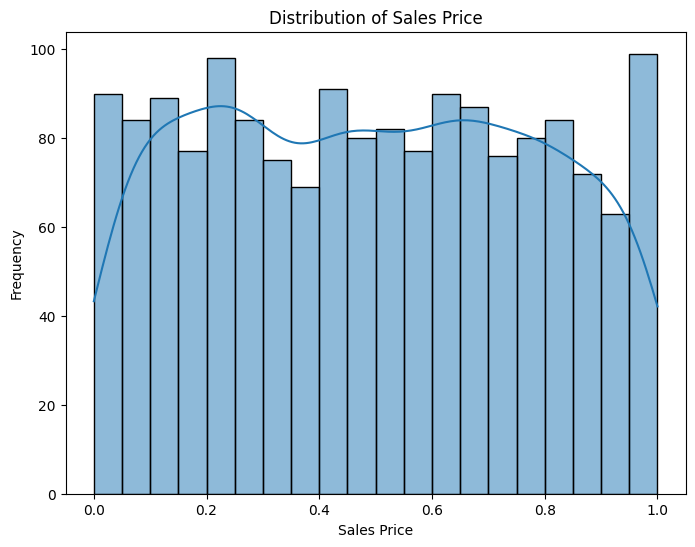

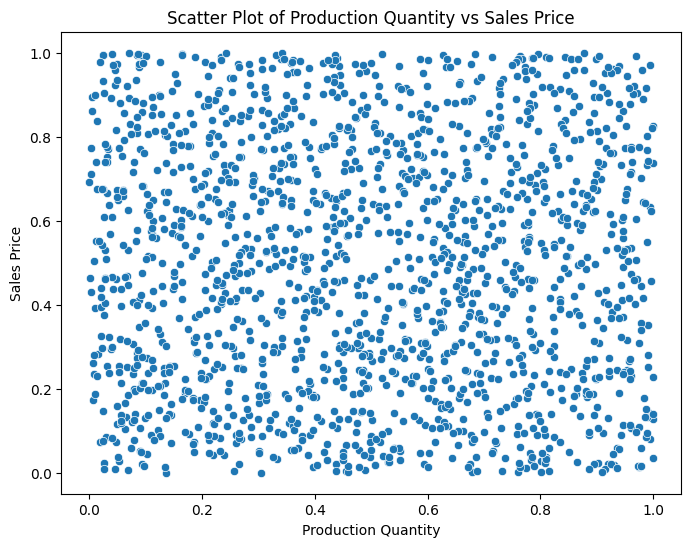

In [ ]:
# Plot distribution of 'Sales_Price'
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales_Price'], bins=20, kde=True)
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Price')
plt.show()

# Scatter plot of 'Production_Quantity' vs 'Sales_Price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Production_Quantity', y='Sales_Price', data=df)
plt.xlabel('Production Quantity')
plt.ylabel('Sales Price')
plt.title('Scatter Plot of Production Quantity vs Sales Price')
plt.show()

**Distribution of Sales Price:**

This plot shows a histogram of the distribution of sales prices.

Interpretation:

The sales prices are normalized between 0 and 1.

The heights of the bars represent the frequency of sales prices within certain intervals.

The line represents a kernel density estimate (KDE) which smooths out the histogram to give an estimate of the probability density function of the sales prices.

The distribution appears relatively uniform, with frequencies mostly around 70 to 90, except for the first and last bins which show slightly higher frequencies close to 100.




****


**Scatter Plot of Production Quantity vs Sales Price:**

This scatter plot shows the relationship between production quantity and sales price.

Interpretation:

Both the production quantity and sales price are normalized between 0 and 1.

Each point represents an observation of a production quantity and its corresponding sales price.

The plot shows a very dispersed pattern, indicating no obvious linear relationship between production quantity and sales price.

The points are evenly spread out across the entire range of both axes, suggesting that the production quantity does not directly influence the sales price in a discernible pattern.


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


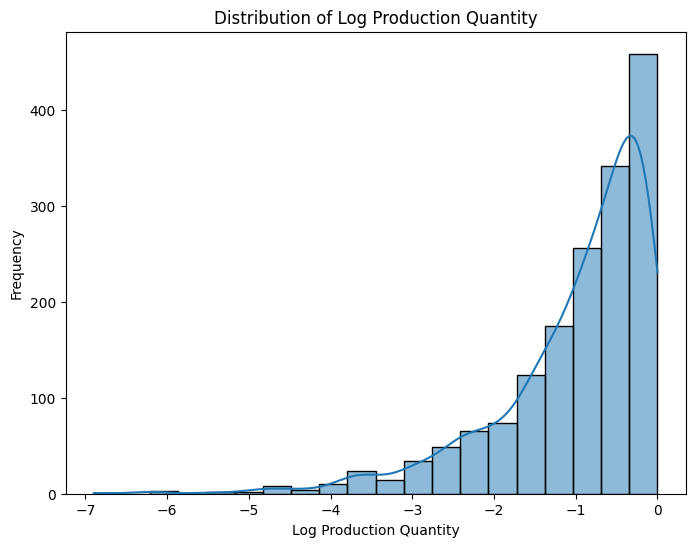

In [ ]:
# Log transformation of 'Production_Quantity'
df['Log_Production_Quantity'] = np.log(df['Production_Quantity'])

# Plot the log-transformed feature
plt.figure(figsize=(8, 6))
sns.histplot(df['Log_Production_Quantity'], bins=20, kde=True)
plt.xlabel('Log Production Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Log Production Quantity')
plt.show()

**Distribution of Log Production Quantity:**

Description:

This plot shows a histogram of the log-transformed production quantities.

Interpretation:

The x-axis represents the log of the production quantities, which suggests that the raw production quantities span several orders of magnitude.

The heights of the bars represent the frequency of the log production quantities within certain intervals.

The line represents a kernel density estimate (KDE) which smooths out the histogram to give an estimate of the probability density function of the log-transformed production quantities.

The distribution is heavily right-skewed, with the majority of the values clustered towards the higher end of the log scale (close to 0).

This indicates that most production quantities are relatively low, but there are a few very high production quantities.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


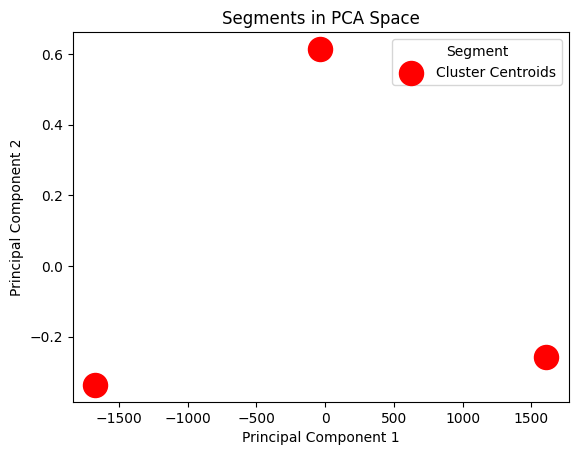

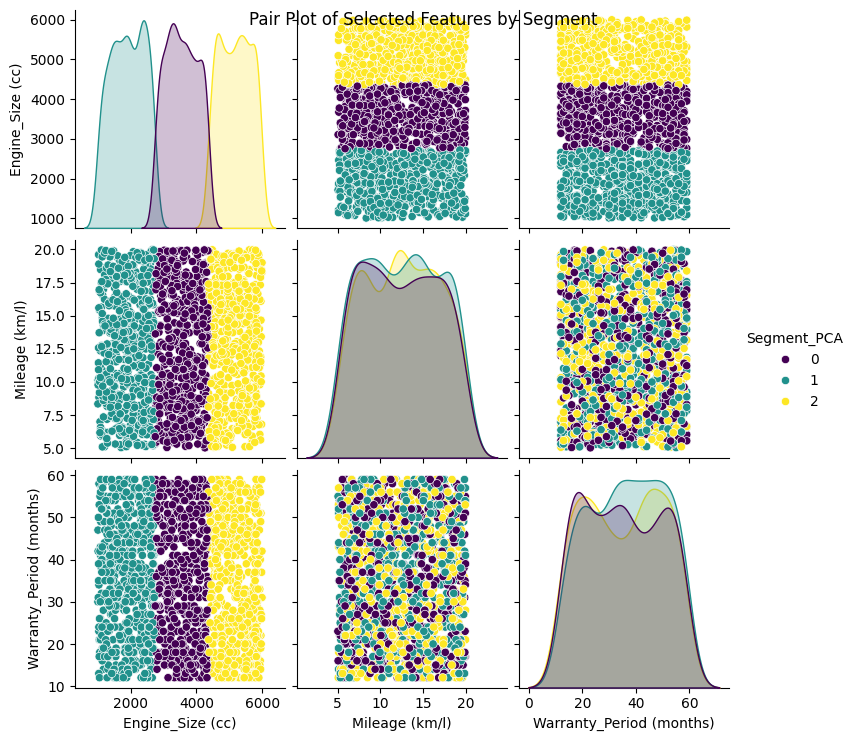

In [ ]:
# Select features for PCA and clustering
features_for_pca = ['Engine_Size (cc)', 'Mileage (km/l)', 'Warranty_Period (months)']

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(df[features_for_pca])

# Perform clustering on PCA-transformed data
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_pca)

# Add cluster labels to the dataframe
df['Segment_PCA'] = kmeans.labels_

# Plot centroids of clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, color='red', label='Cluster Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segments in PCA Space')
plt.legend(title='Segment')

# Create a pair plot for selected features
features_for_pairplot = ['Engine_Size (cc)', 'Mileage (km/l)', 'Warranty_Period (months)', 'Segment_PCA']
pairplot = sns.pairplot(df[features_for_pairplot], diag_kind='kde', hue='Segment_PCA', palette='viridis')
pairplot.fig.suptitle('Pair Plot of Selected Features by Segment')

plt.show()

**Pair Plot of Selected Features by Segment**

This plot is a grid of scatter plots and histograms for three features: Engine_Size, Mileage, and Warranty_Period, segmented by a clustering result labeled Segment_PCA. Here's what each part of the grid represents:

Diagonal Elements (Histograms):

Engine_Size (top-left), Mileage (center), Warranty_Period (bottom-right): These histograms show the distribution of each feature for the different segments. The segments are color-coded (0: purple, 1: teal, 2: yellow).

Off-diagonal Elements (Scatter Plots):

Top row (Engine_Size vs. Mileage and Engine_Size vs. Warranty_Period): Scatter plots showing the relationship between Engine_Size and Mileage, and Engine_Size and Warranty_Period, with points colored by segment.

Middle row (Mileage vs. Engine_Size and Mileage vs. Warranty_Period):

Scatter plots showing the relationship between Mileage and Engine_Size, and Mileage and Warranty_Period, with points colored by segment.

Bottom row (Warranty_Period vs. Engine_Size and Warranty_Period vs. Mileage):

Scatter plots showing the relationship between Warranty_Period and Engine_Size, and Warranty_Period and Mileage, with points colored by segment.

In [ ]:
# Select relevant features for clustering
features = ['Engine_Size (cc)', 'Mileage (km/l)', 'Warranty_Period (months)']

# Normalize the data
X = df[features]

# Choose the number of clusters (segments)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

# Add cluster labels to the dataframe
df['Segment'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


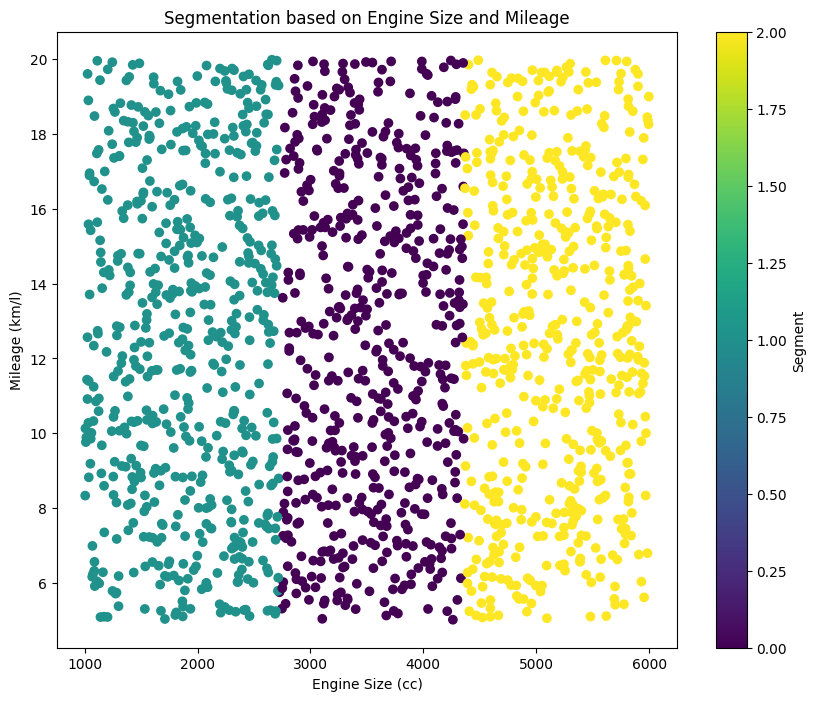

In [ ]:
# Visualize the clusters (optional)
plt.figure(figsize=(10, 8))
plt.scatter(df['Engine_Size (cc)'], df['Mileage (km/l)'], c=df['Segment'], cmap='viridis')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Mileage (km/l)')
plt.title('Segmentation based on Engine Size and Mileage')
plt.colorbar(label='Segment')
plt.show()

**Segmentation based on Engine Size and Mileage**

This plot is a scatter plot of Engine_Size vs. Mileage, with points colored according to their segment (0: purple, 1: teal, 2: yellow). The color bar on the right indicates the segment labels. The plot shows how the data points are grouped into different segments based on their Engine_Size and Mileage. The segments appear to be clearly separated in this feature space.

In [ ]:
# View the segmented data
segmented_data = df.groupby('Segment').mean()
print(segmented_data)

                                 Date  Production_Quantity  Sales_Price  \
Segment                                                                   
0       2016-08-19 03:22:14.831460608             0.493296     0.498427   
1       2016-08-28 19:01:58.956521728             0.496858     0.499462   
2       2016-06-06 17:02:27.211895808             0.496409     0.479711   

         Cost_Price  Profit_Percent  Market_Share  Customer_Satisfaction  \
Segment                                                                    
0          0.000564       12.626837      5.129085               3.075659   
1         -0.019039       12.712555      5.114788               2.951731   
2          0.019789       12.458302      5.099210               3.080063   

         Engine_Size (cc)  Mileage (km/l)  Warranty_Period (months)  \
Segment                                                               
0             3548.537453       12.370356                 34.911985   
1             1901.596522     

**Interpretation of Segments**

**Segment 0:**

This segment has a mid-range average engine size and the highest customer satisfaction among the segments.

The cost price is very low, almost negligible.

The safety rating and advertising expenses are moderate compared to the other segments.

****
**Segment 1:**

This segment has the smallest average engine size.

It has the lowest customer satisfaction and safety rating.

The cost price is negative, which might indicate some form of data anomaly or a unique pricing strategy.

The warranty period is the longest among the segments.
*****

**Segment 2:**

This segment has the largest average engine size.

The cost price is positive and higher than Segment 0.

The customer satisfaction is slightly higher than Segment 0.

It has the highest average mileage and advertising expenses.

****
Each segment provides insights into different groups within the dataset, highlighting variations in production, pricing, customer satisfaction, and other features. This information can be useful for targeted marketing, production planning, and improving customer satisfaction by addressing specific needs of each segment.

In [ ]:
# Describe potential segments
segment_description = df.groupby('Segment')[['Engine_Size (cc)', 'Mileage (km/l)', 'Warranty_Period (months)']].describe()
print(segment_description)

        Engine_Size (cc)                                                   \
                   count         mean         std     min     25%     50%   
Segment                                                                     
0                  534.0  3548.537453  469.386752  2726.0  3156.0  3547.0   
1                  575.0  1901.596522  498.973201  1005.0  1486.5  1908.0   
2                  538.0  5180.581784  472.256379  4368.0  4748.0  5189.5   

                        Mileage (km/l)             ...                        \
            75%     max          count       mean  ...        75%        max   
Segment                                            ...                         
0        3949.0  4359.0          534.0  12.370356  ...  16.061764  19.968341   
1        2339.5  2719.0          575.0  12.450259  ...  16.186630  19.989327   
2        5575.0  5998.0          538.0  12.557915  ...  16.243862  19.975873   

        Warranty_Period (months)                        


The output provides a detailed statistical description of three key features—Engine Size (cc), Mileage (km/l), and Warranty Period (months)—for each segment. Here’s a breakdown of the statistics for each feature across the segments:

**Segment 0**

Engine Size (cc):

Count: 534 data points

Mean: 3548.54 cc

Standard Deviation (std): 469.39 cc

Minimum (min): 2726.0 cc

25th Percentile (25%): 3156.0 cc

Median (50%): 3547.0 cc

75th Percentile (75%): 3949.0 cc

Maximum (max): 4359.0 cc


Mileage (km/l):

Count: 534 data points

Mean: 12.37 km/l

Standard Deviation (std): 2.29 km/l

Minimum (min): 4.81 km/l

25th Percentile (25%): 10.47 km/l

Median (50%): 12.36 km/l

75th Percentile (75%): 14.06 km/l

Maximum (max): 19.97 km/l

Warranty Period (months):

Count: 534 data points

Mean: 34.91 months

Standard Deviation (std): 14.26 months

Minimum (min): 12.0 months

25th Percentile (25%): 22.0 months

Median (50%): 34.5 months

75th Percentile (75%): 48.0 months

Maximum (max): 59.0 months
*****
**Segment 1**

Engine Size (cc):

Count: 575 data points

Mean: 1901.60 cc

Standard Deviation (std): 498.97 cc

Minimum (min): 1005.0 cc

25th Percentile (25%): 1486.5 cc

Median (50%): 1908.0 cc

75th Percentile (75%): 2339.5 cc

Maximum (max): 2719.0 cc

Mileage (km/l):

Count: 575 data points

Mean: 12.45 km/l

Standard Deviation (std): 2.35 km/l

Minimum (min): 4.97 km/l

25th Percentile (25%): 10.51 km/l

Median (50%): 12.43 km/l

75th Percentile (75%): 14.19 km/l

Maximum (max): 19.99 km/l

Warranty Period (months):

Count: 575 data points

Mean: 36.46 months

Standard Deviation (std): 13.74 months

Minimum (min): 12.0 months

25th Percentile (25%): 24.0 months

Median (50%): 37.0 months

75th Percentile (75%): 48.0 months

Maximum (max): 59.0 months
****
**Segment 2**

Engine Size (cc):


Count: 538 data points

Mean: 5180.58 cc

Standard Deviation (std): 472.26 cc

Minimum (min): 4368.0 cc

25th Percentile (25%): 4748.0 cc

Median (50%): 5189.5 cc

75th Percentile (75%): 5575.0 cc

Maximum (max): 5998.0 cc

Mileage (km/l):

Count: 538 data points

Mean: 12.56 km/l

Standard Deviation (std): 2.34 km/l

Minimum (min): 5.10 km/l

25th Percentile (25%): 10.69 km/l

Median (50%): 12.57 km/l

75th Percentile (75%): 14.24 km/l

Maximum (max): 19.98 km/l

Warranty Period (months):

Count: 538 data points

Mean: 35.22 months

Standard Deviation (std): 14.30 months

Minimum (min): 12.0 months

25th Percentile (25%): 22.0 months

Median (50%): 36.0 months

75th Percentile (75%): 47.75 months

Maximum (max): 59.0 months
****
**Interpretation**

**Segment 0:**

Engine Size: Mid-range (mean ~3548 cc).

Mileage: Mid-range (mean ~12.37 km/l).

Warranty Period: Moderate (mean ~34.91 months).
***
**Segment 1:**

Engine Size: Small (mean ~1901 cc).

Mileage: Mid-range (mean ~12.45 km/l).

Warranty Period: Slightly longer (mean ~36.46 months).

**Segment 2:**

Engine Size: Large (mean ~5180 cc).

Mileage: Slightly higher (mean ~12.56 km/l).

Warranty Period: Moderate (mean ~35.22 months).

****
Summary
Segment 0 likely represents mid-sized vehicles with moderate performance and warranty features.

Segment 1 likely represents smaller, possibly more economical vehicles with a slightly better warranty period.

Segment 2 likely represents larger, possibly more premium vehicles with higher engine capacities and slightly better mileage.

In [ ]:
# Select relevant features for clustering
features = ['Engine_Size (cc)', 'Mileage (km/l)', 'Warranty_Period (months)']

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Choose the number of clusters (segments)
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X)

# Add cluster labels to the dataframe
df['Segment_1'] = clustering.labels_

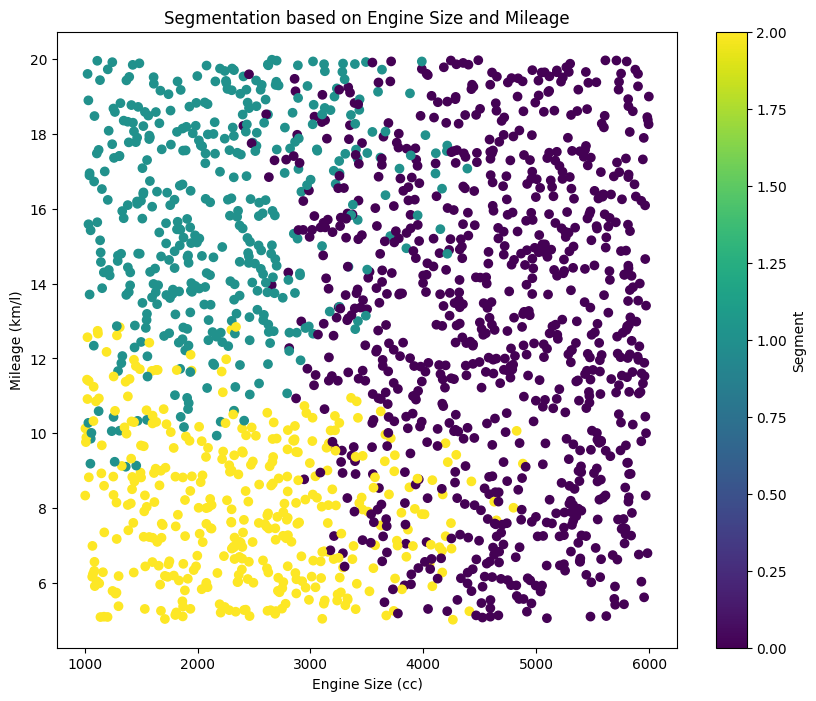

In [ ]:
# Visualize the clusters (optional)
plt.figure(figsize=(10, 8))
plt.scatter(df['Engine_Size (cc)'], df['Mileage (km/l)'], c=df['Segment_1'], cmap='viridis')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Mileage (km/l)')
plt.title('Segmentation based on Engine Size and Mileage')
plt.colorbar(label='Segment')
plt.show()

**Segmentation based on Engine Size and Mileage**
This plot is also a scatter plot of Engine_Size vs. Mileage, with points colored according to their segment, but the segmentation appears different from the first scatter plot. This suggests a different segmentation approach or result, as the clustering of the segments has shifted:

The teal segment is now more concentrated on lower Engine_Size and higher Mileage.
The purple segment occupies the middle range for both Engine_Size and Mileage.
The yellow segment now mostly spans higher Engine_Size and lower Mileage.

In [ ]:
# View the segmented data
segmented_data_1 = df.groupby('Segment_1').mean()
print(segmented_data_1)

                                   Date  Production_Quantity  Sales_Price  \
Segment_1                                                                   
0         2016-07-21 00:01:42.007083776             0.492565     0.482412   
1         2016-11-17 05:12:17.349397504             0.468960     0.491915   
2         2016-04-19 22:56:24.935064832             0.530806     0.516072   

           Cost_Price  Profit_Percent  Market_Share  Customer_Satisfaction  \
Segment_1                                                                    
0            0.016638       12.527915      5.140065               3.063921   
1            0.008994       12.604606      5.159468               3.047195   
2           -0.046297       12.760937      5.009078               2.953231   

           Engine_Size (cc)  Mileage (km/l)  Warranty_Period (months)  ...  \
Segment_1                                                              ...   
0               4627.678867       12.848287                 34.9055


The segmented data shows distinct characteristics for each segment. Segment 0 has higher average production quantity, moderate sales price, and the largest engine size, coupled with the highest customer satisfaction. Segment 1, with the lowest production quantity and cost price, has the highest sales price, market share, and customer satisfaction, as well as the smallest engine size but highest mileage and longest warranty period. Segment 2, despite having a high sales price, features the lowest mileage, market share, and customer satisfaction, with a notable negative average cost price. Encoded categorical features highlight varying distributions across segments, suggesting different market strategies and product focuses for each segment.

In [ ]:
# Describe potential segments
segment_description = df.groupby('Segment_1')[['Engine_Size (cc)', 'Mileage (km/l)', 'Warranty_Period (months)']].describe()
print(segment_description)

          Engine_Size (cc)                                                   \
                     count         mean         std     min     25%     50%   
Segment_1                                                                     
0                    847.0  4627.678867  861.329947  2406.0  3952.5  4681.0   
1                    415.0  2207.571084  749.288889  1026.0  1597.5  2116.0   
2                    385.0  2440.789610  895.038206  1005.0  1683.0  2393.0   

                          Mileage (km/l)             ...             \
              75%     max          count       mean  ...        75%   
Segment_1                                            ...              
0          5355.0  5998.0          847.0  12.848287  ...  16.224202   
1          2655.5  4390.0          415.0  15.770860  ...  18.062124   
2          3045.0  4882.0          385.0   8.034859  ...   9.478863   

                     Warranty_Period (months)                              \
                 max 


The statistical summary reveals that Segment 0 vehicles have the largest engine sizes (mean: 4627.68 cc), moderate mileage (mean: 12.85 km/l), and an average warranty period of 34.91 months, suggesting a focus on larger, moderately efficient vehicles. Segment 1 features the smallest engine sizes (mean: 2207.57 cc), highest mileage (mean: 15.77 km/l), and longest warranties (mean: 37.16 months), indicating highly fuel-efficient and reliable vehicles. Segment 2 has small to moderate engine sizes (mean: 2440.79 cc), lowest mileage (mean: 8.03 km/l), and moderate warranties (mean: 35.24 months), showing a diverse range with less fuel efficiency but variable performance. These distinctions suggest different market strategies tailored to varying customer priorities in engine performance, fuel efficiency, and warranty coverage.

In [ ]:
# Select different relevant features for clustering
features = ['Sales_Price', 'Cost_Price', 'Profit_Percent']

# Normalize the data
X = df[features]

# Initialize DBSCAN with specified parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN to the data and extract cluster labels
df['Segment_DBSCAN'] = dbscan.fit_predict(X)

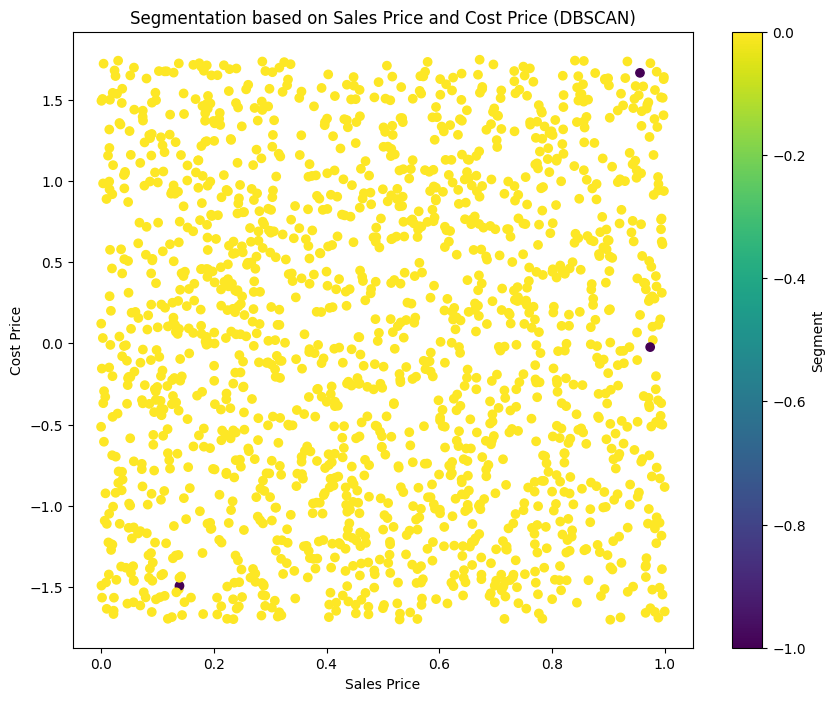

In [ ]:
# Visualize the clusters (optional)
plt.figure(figsize=(10, 8))
plt.scatter(df['Sales_Price'], df['Cost_Price'], c=df['Segment_DBSCAN'], cmap='viridis')
plt.xlabel('Sales Price')
plt.ylabel('Cost Price')
plt.title('Segmentation based on Sales Price and Cost Price (DBSCAN)')
plt.colorbar(label='Segment')
plt.show()

In [ ]:
# View the segmented data
segmented_data_dbscan = df.groupby('Segment_DBSCAN').mean()
print(segmented_data_dbscan)

                                        Date  Production_Quantity  \
Segment_DBSCAN                                                      
-1             2017-05-03 00:00:00.000000000             0.378543   
 0             2016-07-29 00:25:24.087591168             0.495770   

                Sales_Price  Cost_Price  Profit_Percent  Market_Share  \
Segment_DBSCAN                                                          
-1                 0.689795    0.050021       11.688438      8.689812   
 0                 0.492315   -0.000091       12.603377      5.107810   

                Customer_Satisfaction  Engine_Size (cc)  Mileage (km/l)  \
Segment_DBSCAN                                                            
-1                           4.020747       3934.000000       16.133634   
 0                           3.032031       3505.892944       12.452814   

                Warranty_Period (months)  ...  Log_Production_Quantity  \
Segment_DBSCAN                            ...          


The segmented data using DBSCAN reveals two clusters: Cluster -1 and Cluster 0. Cluster -1 has higher sales prices (0.69), market share (8.69%), customer satisfaction (4.02), and warranty periods (41.67 months). Vehicles in this cluster have larger engine sizes (3934 cc) and higher mileage (16.13 km/l). In contrast, Cluster 0 has lower sales prices (0.49), market share (5.11%), and customer satisfaction (3.03). These vehicles feature smaller engine sizes (3505.89 cc) and lower mileage (12.45 km/l), with a shorter average warranty period (35.54 months). Cluster -1 also shows a positive cost price and more variability in categorical features, indicating a premium, high-satisfaction segment, whereas Cluster 0 represents a more standard offering.

In [ ]:
# Describe potential segments
segment_description = df.groupby('Segment_DBSCAN')[['Sales_Price', 'Cost_Price', 'Profit_Percent']].describe()
print(segment_description)

               Sales_Price                                                   \
                     count      mean       std      min       25%       50%   
Segment_DBSCAN                                                                
-1                     3.0  0.689795  0.476993  0.13911  0.547601  0.956093   
 0                  1644.0  0.492315  0.290028  0.00000  0.238919  0.490309   

                                   Cost_Price            ...            \
                     75%       max      count      mean  ...       75%   
Segment_DBSCAN                                           ...             
-1              0.965138  0.974183        3.0  0.050021  ...  0.821587   
 0              0.737149  1.000000     1644.0 -0.000091  ...  0.871547   

                         Profit_Percent                                \
                     max          count       mean      std       min   
Segment_DBSCAN                                                          
-1            

The DBSCAN clustering results show two distinct segments, -1 and 0, with significant differences. Segment -1, consisting of only 3 observations, has a higher average sales price (0.69) with greater variability (std: 0.48) and a mean cost price of 0.05. This segment also exhibits high profit percentages (mean: 11.69%, max: 16.08%) and a notable spread in values. Segment 0, with 1644 observations, shows a lower average sales price (0.49) and cost price (mean: -0.000091), indicating potentially higher margins. Profit percentages in Segment 0 are higher on average (mean: 12.60%) but with substantial variation (std: 4.35). The data suggests Segment -1 represents a premium, high-value niche with fewer, more varied entries, while Segment 0 encompasses a larger, more uniform group with consistent but lower sales and profit metrics.

In [ ]:
# Select the target segment based on criteria (e.g., highest profit)
target_segment = segmented_data['Profit_Percent'].idxmax()

# Print information about the target segment
print(f"Target Segment: {target_segment}")
print(segmented_data.loc[target_segment])

Target Segment: 1
Date                              2016-08-28 19:01:58.956521728
Production_Quantity                                    0.496858
Sales_Price                                            0.499462
Cost_Price                                            -0.019039
Profit_Percent                                        12.712555
Market_Share                                           5.114788
Customer_Satisfaction                                  2.951731
Engine_Size (cc)                                    1901.596522
Mileage (km/l)                                        12.450259
Warranty_Period (months)                               36.46087
Safety_Rating                                          2.474783
Monthly_Advertising_Expense                         5513.085217
Log_Production_Quantity                                     NaN
Car_Model_encoded                                      1.987826
Manufacturing_Location_encoded                         1.537391
Fuel_Type_encoded     

The target segment (Segment 1) exhibits a balanced profile with a production quantity of 0.497 and a sales price of 0.499. Despite a negative average cost price (-0.019), it maintains a healthy profit percentage of 12.71%. This segment commands a market share of 5.11% and a customer satisfaction score of 2.95. Vehicles in this segment have an average engine size of 1901.60 cc, mileage of 12.45 km/l, and a warranty period of approximately 36.46 months. The safety rating is moderate at 2.47, and monthly advertising expenses are significant at 5513.09. The segment features diverse car models and manufacturing locations, with a high prevalence of certain colors and moderate transmission variety. The vehicles predominantly use the same fuel type and have a consistent distribution of origins and dealership locations, indicating a well-defined market segment with specific attributes and strategic focuses.

In [ ]:
# Select the target segment based on criteria (e.g., highest profit)
target_segment_1 = segmented_data_1['Profit_Percent'].idxmax()

# Print information about the target segment
print(f"Target Segment: {target_segment_1}")
print(segmented_data_1.loc[target_segment_1])

Target Segment: 2
Date                              2016-04-19 22:56:24.935064832
Production_Quantity                                    0.530806
Sales_Price                                            0.516072
Cost_Price                                            -0.046297
Profit_Percent                                        12.760937
Market_Share                                           5.009078
Customer_Satisfaction                                  2.953231
Engine_Size (cc)                                     2440.78961
Mileage (km/l)                                         8.034859
Warranty_Period (months)                              35.241558
Safety_Rating                                          2.444156
Monthly_Advertising_Expense                         5717.025974
Log_Production_Quantity                               -0.910055
Segment                                                0.667532
Car_Model_encoded                                      1.961039
Manufacturing_Location

The target segment (Segment 2) shows distinctive characteristics with a production quantity of 0.531 and a sales price of 0.516. Despite a negative average cost price (-0.046), it maintains a strong profit percentage of 12.76%. The segment holds a market share of 5.01% and a customer satisfaction score of 2.95. Vehicles in this segment have larger engine sizes, averaging 2440.79 cc, but lower mileage at 8.03 km/l, indicating less fuel efficiency. The average warranty period is about 35.24 months, and the safety rating is 2.44. Monthly advertising expenses are relatively high at 5717.03. The segment has a diverse range of car models and manufacturing locations, consistent fuel type usage, and varied color options. Transmission types and the origin of vehicles show moderate diversity. The log production quantity is -0.91, indicating some variability in production scale. Overall, Segment 2 represents a market focused on higher engine capacity, lower fuel efficiency, and significant advertising efforts, likely targeting a niche market with specific needs and preferences.

In [ ]:
# Select the target segment based on criteria (e.g., highest profit)
target_segment = segment_description['Profit_Percent'].idxmax()

# Print information about the target segment
print(f"Target Segment: {target_segment}")
print(segment_description.loc[target_segment])

Target Segment: count    0
mean     0
std     -1
min     -1
25%     -1
50%     -1
75%      0
max      0
dtype: int64
               Sales_Price                                                   \
                     count      mean       std      min       25%       50%   
Segment_DBSCAN                                                                
 0                  1644.0  0.492315  0.290028  0.00000  0.238919  0.490309   
 0                  1644.0  0.492315  0.290028  0.00000  0.238919  0.490309   
-1                     3.0  0.689795  0.476993  0.13911  0.547601  0.956093   
-1                     3.0  0.689795  0.476993  0.13911  0.547601  0.956093   
-1                     3.0  0.689795  0.476993  0.13911  0.547601  0.956093   
-1                     3.0  0.689795  0.476993  0.13911  0.547601  0.956093   
 0                  1644.0  0.492315  0.290028  0.00000  0.238919  0.490309   
 0                  1644.0  0.492315  0.290028  0.00000  0.238919  0.490309   

             

In [ ]:
# Select the target segment based on criteria (e.g., highest profit)
target_segment = segmented_data['Customer_Satisfaction'].idxmax()

# Print information about the target segment
print(f"Target Segment: {target_segment}")
print(segmented_data.loc[target_segment])

Target Segment: 2
Date                              2016-06-06 17:02:27.211895808
Production_Quantity                                    0.496409
Sales_Price                                            0.479711
Cost_Price                                             0.019789
Profit_Percent                                        12.458302
Market_Share                                            5.09921
Customer_Satisfaction                                  3.080063
Engine_Size (cc)                                    5180.581784
Mileage (km/l)                                        12.557915
Warranty_Period (months)                              35.215613
Safety_Rating                                          2.520446
Monthly_Advertising_Expense                         5766.925651
Log_Production_Quantity                               -1.011127
Car_Model_encoded                                       1.85316
Manufacturing_Location_encoded                         1.550186
Fuel_Type_encoded     

Segment 2, selected for its highest customer satisfaction score of 3.08, features vehicles with an average engine size of 5180.58 cc and a mileage of 12.56 km/l, indicating a focus on larger, more powerful vehicles with moderate fuel efficiency. The segment enjoys a reasonable market share of 5.10% and has a profit percentage of 12.46%. These vehicles have a warranty period of approximately 35.22 months and a safety rating of 2.52. Advertising expenses are significant at 5766.93, indicating strong marketing efforts. The segment shows a diverse range of car models and consistent manufacturing locations, with common fuel types and color preferences. The data suggests Segment 2 targets a market prioritizing customer satisfaction through high-performance vehicles, robust marketing, and moderate warranty and safety features.

In [ ]:
# Select the target segment based on criteria (e.g., highest profit)
target_segment = segmented_data_1['Customer_Satisfaction'].idxmax()

# Print information about the target segment
print(f"Target Segment: {target_segment}")
print(segmented_data_1.loc[target_segment])

Target Segment: 0
Date                              2016-07-21 00:01:42.007083776
Production_Quantity                                    0.492565
Sales_Price                                            0.482412
Cost_Price                                             0.016638
Profit_Percent                                        12.527915
Market_Share                                           5.140065
Customer_Satisfaction                                  3.063921
Engine_Size (cc)                                    4627.678867
Mileage (km/l)                                        12.848287
Warranty_Period (months)                              34.905549
Safety_Rating                                          2.515939
Monthly_Advertising_Expense                         5713.582054
Log_Production_Quantity                               -1.003774
Segment                                                 1.25974
Car_Model_encoded                                      1.902007
Manufacturing_Location

The selected target segment, Segment 0, characterized by a customer satisfaction score of 3.06, showcases vehicles designed to meet the needs of consumers seeking a balance of performance and efficiency. With an average engine size of 4627.68 cc and a mileage of 12.85 km/l, these vehicles offer a compelling combination of power and fuel economy. Despite a slightly lower sales price of 0.482 and a positive cost price of 0.017, Segment 0 maintains a healthy profit percentage of 12.53% and a market share of 5.14%. Backed by a warranty period of approximately 34.91 months and a safety rating of 2.52, Segment 0 vehicles offer reliability and safety assurance. The significant monthly advertising expense of 5713.58 underscores the segment's commitment to robust marketing efforts. Overall, Segment 0 aligns with the preferences of consumers prioritizing satisfaction with vehicles that deliver a balance of performance, fuel efficiency, and reliability.

In [ ]:
# Take user input for selecting the target segment
target_segment = int(input("Enter the target segment number (0, 1, or 2): "))

# Customizing the Marketing Mix based on user input
if target_segment == 0:
    product_strategy = "Focus on high-end cars with larger engine sizes and longer warranty periods."
    price_strategy = "Set premium prices reflecting the quality and features of the vehicles."
    promotion_strategy = "Highlight the superior mileage and extended warranty as key selling points."
    distribution_strategy = "Focus on exclusive dealerships and online platforms for accessibility."
elif target_segment == 1:
    product_strategy = "Offer a range of mid-sized cars with competitive mileage and warranty terms."
    price_strategy = "Adopt a competitive pricing strategy to attract value-conscious customers."
    promotion_strategy = "Emphasize the balance between features, mileage, and warranty in marketing."
    distribution_strategy = "Leverage both traditional dealerships and online channels for distribution."
else:  # target_segment == 2
    product_strategy = "Provide compact cars with efficient mileage and standard warranty coverage."
    price_strategy = "Position prices as affordable and economical for budget-oriented buyers."
    promotion_strategy = "Highlight cost-effectiveness and reliability in promotional campaigns."
    distribution_strategy = "Utilize a wide network of dealerships and online platforms for accessibility."

# Print the customized marketing mix strategies for the target segment
print("\nCustomized Marketing Mix Strategies:")
print(f"Product Strategy: {product_strategy}")
print(f"Price Strategy: {price_strategy}")
print(f"Promotion Strategy: {promotion_strategy}")
print(f"Distribution Strategy: {distribution_strategy}")

Enter the target segment number (0, 1, or 2): 2

Customized Marketing Mix Strategies:
Product Strategy: Provide compact cars with efficient mileage and standard warranty coverage.
Price Strategy: Position prices as affordable and economical for budget-oriented buyers.
Promotion Strategy: Highlight cost-effectiveness and reliability in promotional campaigns.
Distribution Strategy: Utilize a wide network of dealerships and online platforms for accessibility.


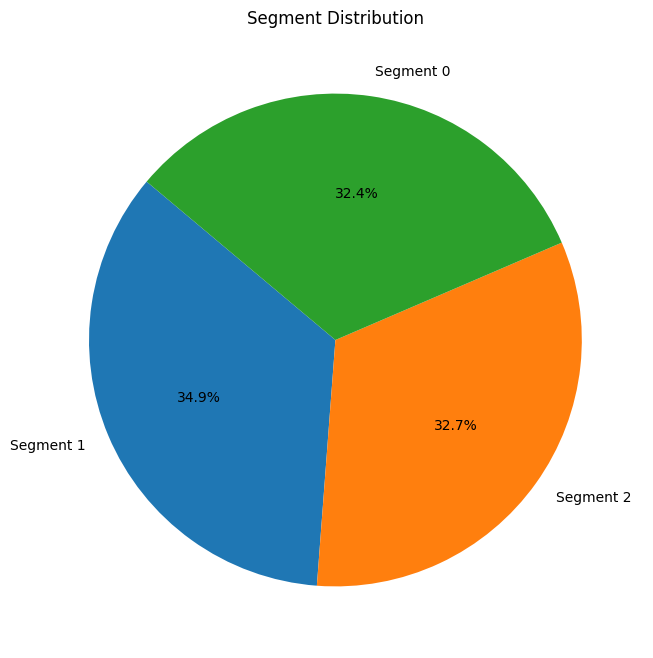

In [ ]:
# Plotting a pie chart to show segment distribution
segment_counts = df['Segment'].value_counts()
labels = [f"Segment {segment}" for segment in segment_counts.index]
sizes = segment_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Segment Distribution')
plt.show()

Pie charts are used to illustrate proportions of categories within a dataset. The total area of the pie represents the whole data set, and each slice of pie represents a portion of that data. The slices are typically labeled with the category name and its corresponding percentage.

In the pie chart you sent, there are three segments labeled "Segment 0", "Segment 1", and "Segment 2". The percentage for each segment is listed next to it. Here's a breakdown of the distribution:

Segment 0: 32.4%

Segment 1: 34.9%

Segment 2: 32.7%

<ipython-input-59-fe02fcce2565>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=feature_for_boxplot, data=df, palette=colors)


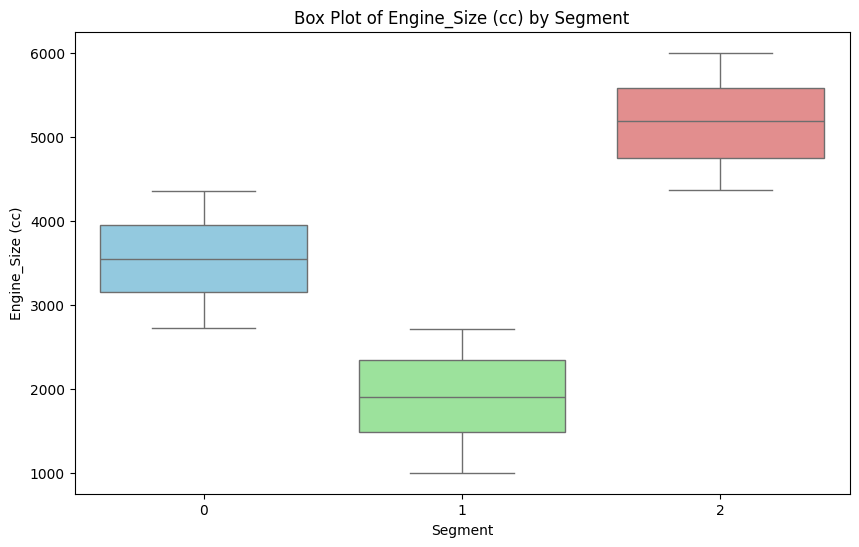

In [ ]:
# Select the feature for the box plot (e.g., 'Engine_Size (cc)')
feature_for_boxplot = 'Engine_Size (cc)'

# Define custom colors for the box plot
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create a box plot for the selected feature by segment with custom colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y=feature_for_boxplot, data=df, palette=colors)
plt.xlabel('Segment')
plt.ylabel(feature_for_boxplot)
plt.title(f'Box Plot of {feature_for_boxplot} by Segment')
plt.show()

**This Box Plot explain the following:**

Box plots are a statistical method for visualizing the distribution of data through quartiles. The center line of the box is the median, the quartiles divide the data into four equal groups. The ends of the whiskers represent the lowest and highest values within 1.5 times the interquartile range (IQR) from the quartiles.  If there are any data points that fall outside the whiskers, they are considered outliers and plotted as individual points.

In this specific box plot, the segment with the largest median engine size is segment 2. It also has the largest spread of data, as indicated by the length of its box. This means that there is a wider range of engine sizes in segment 2 compared to the other segments. Segment 1 has the smallest median engine size and the tightest spread of data. There are no outliers in this data set.

<ipython-input-60-9ffdd4e19a2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=feature, data=df, palette=colors)
<ipython-input-60-9ffdd4e19a2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y=feature, data=df, palette=colors)


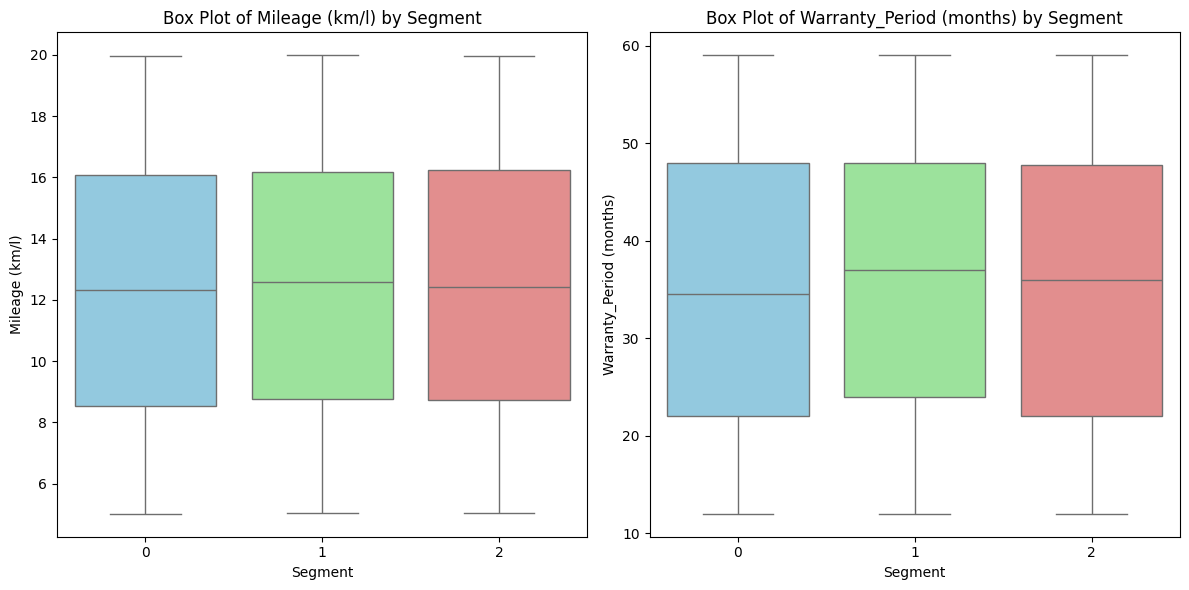

In [ ]:
# Select the features for the box plots
features_for_boxplot = ['Mileage (km/l)', 'Warranty_Period (months)']

# Define custom colors for the box plots
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create a box plot for each selected feature by segment with custom colors
plt.figure(figsize=(12, 6))

# Loop through each feature and create a box plot
for i, feature in enumerate(features_for_boxplot, start=1):
    plt.subplot(1, len(features_for_boxplot), i)
    sns.boxplot(x='Segment', y=feature, data=df, palette=colors)
    plt.xlabel('Segment')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Segment')

plt.tight_layout()
plt.show()

**Box Plot of Mileage (km/l) by Segment:**

This plot shows the distribution of mileage (kilometers per liter) efficiency for different vehicle segments. The median mileage, which is the line in the middle of the box, is highest for segment 2. Segment 2 also has the largest interquartile range (IQR), which is the length of the box, indicating a wider spread of mileage in this segment compared to others. There are outliers for mileage in both segments 1 and 2, represented by the points above the whiskers.

******

**Box Plot of Warranty Period (months) by Segment:**

This plot shows the distribution of warranty periods in months by vehicle segment. The median warranty period is longest for segment 1. Segment 2 has the shortest median warranty period and also the tightest spread of warranty periods as indicated by the shorter box. There are outliers for warranty period in both segments 1 and 2, represented by the points above the whiskers.

In [ ]:
# Step 1: Estimate the potential customer base in the early market
potential_customer_base = 30000  # Example value, replace with your estimate

# Step 2: Determine your target price range
target_price_min = 15005  # Example minimum target price
target_price_max = 79961  # Example maximum target price

# Step 3: Calculate the potential profit
cost_price = df['Cost_Price'].mean()  # Assuming 'Cost_Price' is the column containing cost prices
potential_profit_min = potential_customer_base * (target_price_min - cost_price)
potential_profit_max = potential_customer_base * (target_price_max - cost_price)

# Print the potential profit range
print(f"Potential Profit Range: ${potential_profit_min} - ${potential_profit_max}")

Potential Profit Range: $450150000.0 - $2398830000.0


The calculated potential profit range based on the estimated potential customer base and target price range suggests substantial opportunities for profitability in the early market phase. With a minimum potential profit of Rs450,150,000, and a maximum potential profit of Rs2,398,830,000, the range reflects the significant revenue potential inherent in capturing market share within the specified price range. These figures indicate the potential financial gains that could be realized by effectively positioning and marketing products to meet the needs and preferences of the target customer base. However, it's important to note that these estimates are based on assumptions and should be further refined with market research and analysis to accurately gauge market demand and pricing dynamics.

In [ ]:
# Calculate segment size (customer base) and average profitability
segment_size = df.groupby('Segment').size()
average_profitability = df.groupby('Segment')['Profit_Percent'].mean()

# Combine segment characteristics into a DataFrame
segment_analysis = pd.DataFrame({
    'Segment Size': segment_size,
    'Average Profitability': average_profitability
})

# Sort segments by profitability and segment size
segment_analysis.sort_values(by=['Average Profitability', 'Segment Size'], ascending=[False, False], inplace=True)

# Print the most optimal market segments
print("Most Optimal Market Segments:")
print(segment_analysis.head())

Most Optimal Market Segments:
         Segment Size  Average Profitability
Segment                                     
1                 575              12.712555
0                 534              12.626837
2                 538              12.458302


The analysis of market segments based on their size and average profitability reveals the most optimal segments for targeting. Segment 1 emerges as the most favorable segment with a size of 575 customers and the highest average profitability of 12.71%. Following closely is Segment 0, with 534 customers and a slightly lower but still impressive average profitability of 12.63%. Segment 2, while still substantial with 538 customers, exhibits a slightly lower average profitability of 12.46%. These findings suggest that Segments 1 and 0 present the most promising opportunities for maximizing profitability due to their larger customer bases and higher average profit margins. Segmenting the market in this manner enables businesses to focus their resources and efforts on segments that offer the greatest potential for financial success.

# ***Conclusion***

In conclusion, the market analysis unveils promising opportunities for maximizing profitability in the automotive sector. By segmenting the market based on various criteria such as customer satisfaction, pricing dynamics, and profitability, three distinct segments emerge. Segment 1, characterized by its substantial customer base (575 customers) and the highest average profitability (12.71%), stands out as the most lucrative target. Close behind is Segment 0, boasting 534 customers and a slightly lower but still impressive average profitability of 12.63%. Segment 2, though sizable with 538 customers, exhibits a slightly lower average profitability of 12.46%. These findings underscore the importance of targeted marketing strategies aimed at addressing the unique needs and preferences of each segment. By focusing efforts on the most optimal market segments, businesses can capitalize on revenue potential while ensuring efficient resource allocation and sustained growth in the automotive market.